In [1]:
from analyzer import *
from schedule_gen import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline  
plt.rcParams['figure.figsize'] = [20, 10]
plt.rc("font", size=14)

In [3]:
import importlib

In [65]:
schedules_to_attempt = 100000
number_of_players = 12
repeat_weeks = 2
season_length = 13
year = 2020

In [67]:
%%time
list_of_schedules = generate_schedules(schedules_to_attempt, number_of_players, repeat_weeks, season_length, year, 0)

Generating schedules
total good schedules: 656
number of copies deleted: 0
CPU times: user 3min 26s, sys: 6.45 s, total: 3min 32s
Wall time: 3min 33s


In [68]:
len(list_of_schedules)

656

In [69]:
scores = get_scores(2020)
schedule = get_schedule(2020)

In [70]:
schedule

array([[ 1,  0,  5,  4,  3,  2, 11, 10,  9,  8,  7,  6],
       [ 9,  3,  8,  1, 11, 10,  7,  6,  2,  0,  5,  4],
       [ 2,  4,  0,  9,  1,  6,  5, 11, 10,  3,  8,  7],
       [10,  9,  3,  2,  7, 11,  8,  4,  6,  1,  0,  5],
       [ 6,  2,  1, 10,  9,  7,  0,  5, 11,  4,  3,  8],
       [11, 10,  9,  6,  5,  4,  3,  8,  7,  2,  1,  0],
       [ 7,  6,  4, 11,  2,  8,  1,  0,  5, 10,  9,  3],
       [ 5, 11, 10,  7,  8,  0,  9,  3,  4,  6,  2,  1],
       [ 8,  7,  6,  5, 10,  3,  2,  1,  0, 11,  4,  9],
       [ 4,  5, 11,  8,  0,  1, 10,  9,  3,  7,  6,  2],
       [ 3,  8,  7,  0,  6,  9,  4,  2,  1,  5, 11, 10],
       [ 1,  0,  5,  4,  3,  2, 11, 10,  9,  8,  7,  6],
       [ 9,  3,  8,  1, 11, 10,  7,  6,  2,  0,  5,  4]])

In [49]:
cols = []
for player in get_players():
    cols.append(player.name)
cols

['Chris',
 'Todd',
 'Andy',
 'Greg',
 'Aaron',
 'Robert',
 'Tyler',
 'Stephen',
 'Travis',
 'Mark',
 'Noel',
 'Eric']

In [71]:
df = pd.DataFrame(columns = cols)

In [72]:
for i in range(0, len(list_of_schedules)):
    ranks = []
    for player in range(0, 12):
        ranks.append(calculate_rank(player, list_of_schedules[i], scores, season_length, number_of_players))

    ranks = np.asarray(ranks)
    df.loc[i] = ranks

In [73]:
for col in df.columns:
    df[f'{col}'] = df[f'{col}'].astype(int)

In [74]:
df

,Chris,Todd,Andy,Greg,Aaron,Robert,Tyler,Stephen,Travis,Mark,Noel,Eric
0,7,12,8,11,9,4,10,5,6,2,1,3
1,5,11,2,10,12,7,9,6,8,3,1,4
2,9,12,7,11,6,10,4,1,8,5,3,2
3,5,10,11,12,7,9,8,3,6,4,2,1
4,11,12,8,10,4,2,7,5,9,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
651,10,12,7,11,6,8,9,2,3,4,5,1
652,5,12,7,11,9,6,10,2,8,3,4,1
653,9,10,8,11,6,7,12,3,5,1,4,2
654,7,9,11,10,3,8,12,1,6,2,5,4


In [75]:
df.corr()

,Chris,Todd,Andy,Greg,Aaron,Robert,Tyler,Stephen,Travis,Mark,Noel,Eric
Chris,1.000000,-0.180296,-0.121618,-0.150444,-0.080556,-0.087826,-0.153442,-0.004618,-0.155615,-0.086326,-0.002902,-0.047062
Todd,-0.180296,1.000000,-0.133557,-0.142487,-0.098620,-0.027902,-0.186927,-0.007993,-0.051039,-0.021954,-0.065509,0.050670
Andy,-0.121618,-0.133557,1.000000,-0.138928,-0.164257,-0.182097,-0.141753,-0.033135,-0.153600,0.033440,-0.135007,-0.035739
Greg,-0.150444,-0.142487,-0.138928,1.000000,-0.027246,-0.023704,-0.136527,0.011426,-0.143398,0.044715,0.002950,0.007017
Aaron,-0.080556,-0.098620,-0.164257,-0.027246,1.000000,-0.167948,-0.091202,-0.017852,-0.104957,-0.060875,-0.138424,-0.078696
Robert,-0.087826,-0.027902,-0.182097,-0.023704,-0.167948,1.000000,-0.199191,0.045058,-0.170587,-0.045294,-0.034425,-0.092924
Tyler,-0.153442,-0.186927,-0.141753,-0.136527,-0.091202,-0.199191,1.000000,-0.080087,-0.092555,-0.058940,-0.015620,-0.064315
Stephen,-0.004618,-0.007993,-0.033135,0.011426,-0.017852,0.045058,-0.080087,1.000000,-0.088664,-0.213738,-0.166354,-0.227065
Travis,-0.155615,-0.051039,-0.153600,-0.143398,-0.104957,-0.170587,-0.092555,-0.088664,1.000000,-0.039380,-0.049888,-0.021648
Mark,-0.086326,-0.021954,0.033440,0.044715,-0.060875,-0.045294,-0.058940,-0.213738,-0.039380,1.000000,-0.202135,-0.168515


In [76]:
print(df.corr().replace(1.0, np.nan).min())
print(df.corr().replace(1.0, np.nan).max())

Chris     -0.180296
Todd      -0.186927
Andy      -0.182097
Greg      -0.150444
Aaron     -0.167948
Robert    -0.199191
Tyler     -0.199191
Stephen   -0.227065
Travis    -0.170587
Mark      -0.213738
Noel      -0.233173
Eric      -0.233173
dtype: float64
Chris     -0.002902
Todd       0.050670
Andy       0.033440
Greg       0.044715
Aaron     -0.017852
Robert     0.045058
Tyler     -0.015620
Stephen    0.045058
Travis    -0.021648
Mark       0.044715
Noel       0.002950
Eric       0.050670
dtype: float64


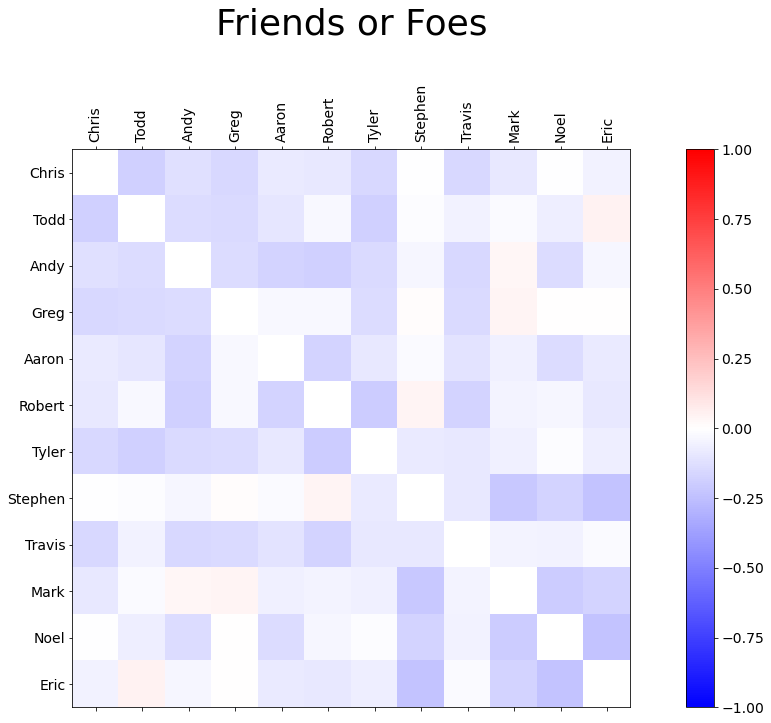

In [77]:
f = plt.figure(figsize=(20, 10))
plt.matshow(df.corr().replace(1.0, np.nan), fignum=f.number, cmap = "bwr", vmax = 1, vmin = -1)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Friends or Foes', fontsize=36, pad = 50);

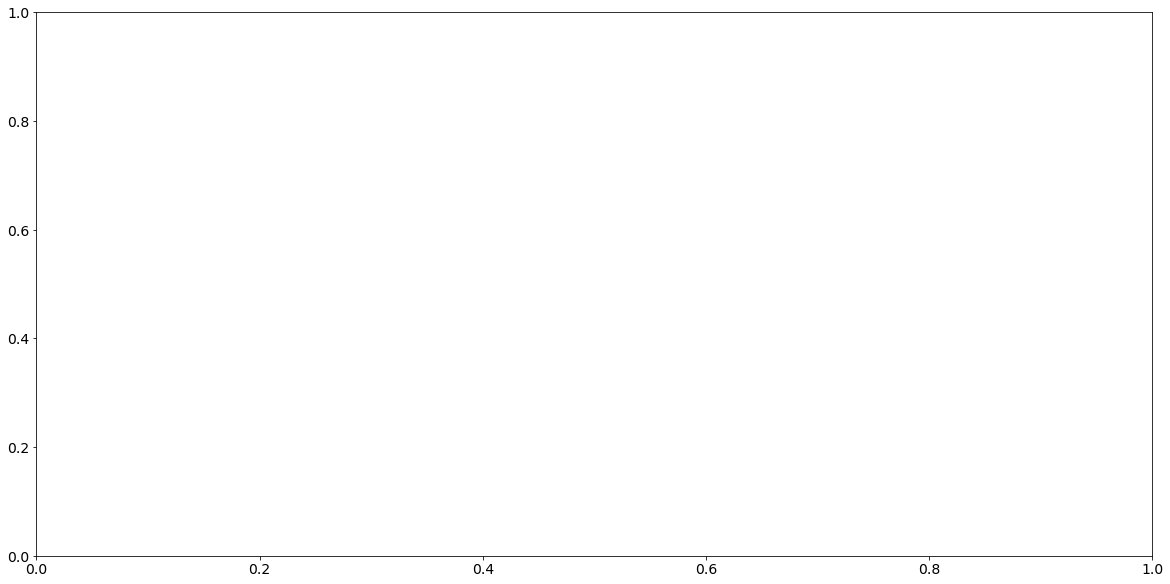

In [78]:
fig, ax = plt.subplots()

In [79]:
list(df.iloc[0])

[7, 12, 8, 11, 9, 4, 10, 5, 6, 2, 1, 3]

In [80]:
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Rectangle

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


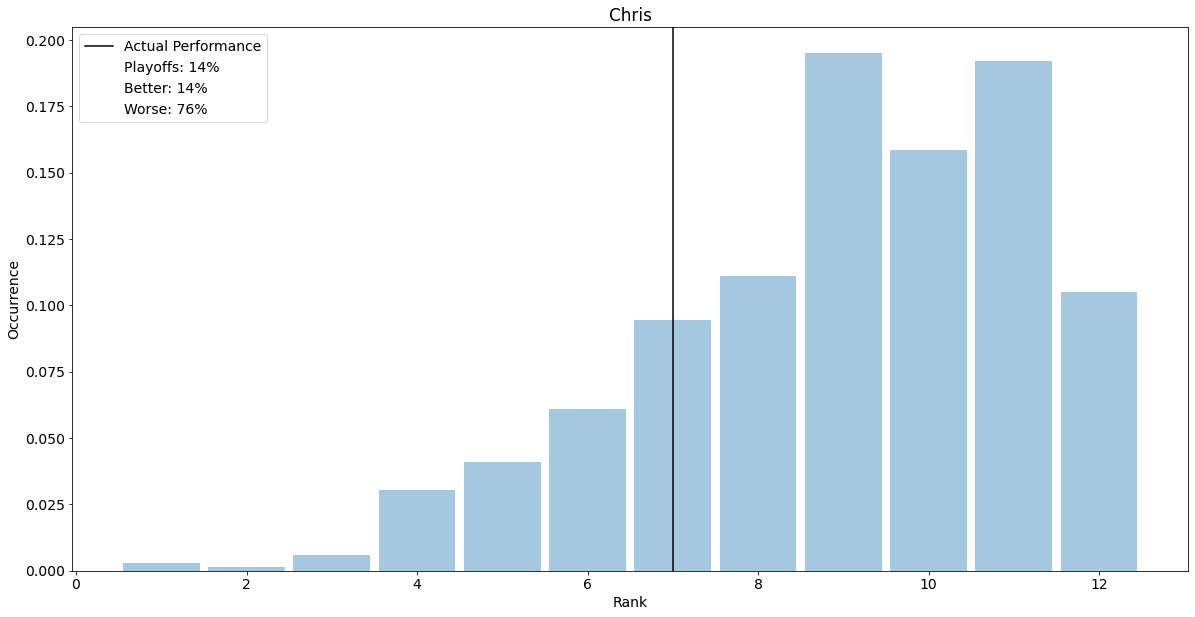

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


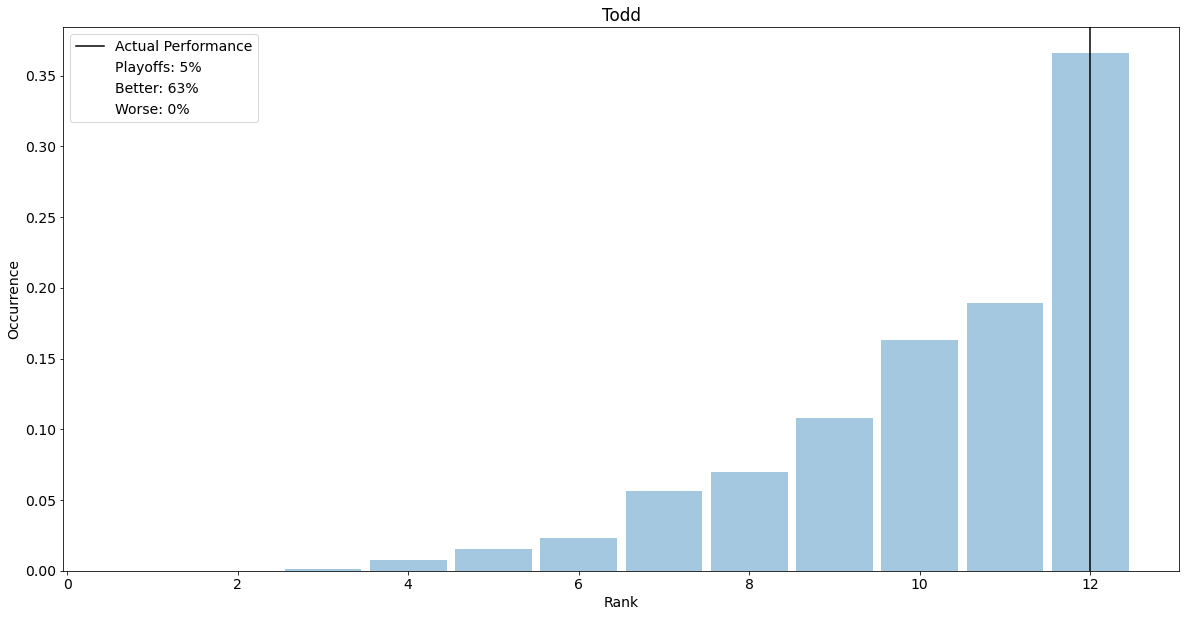

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


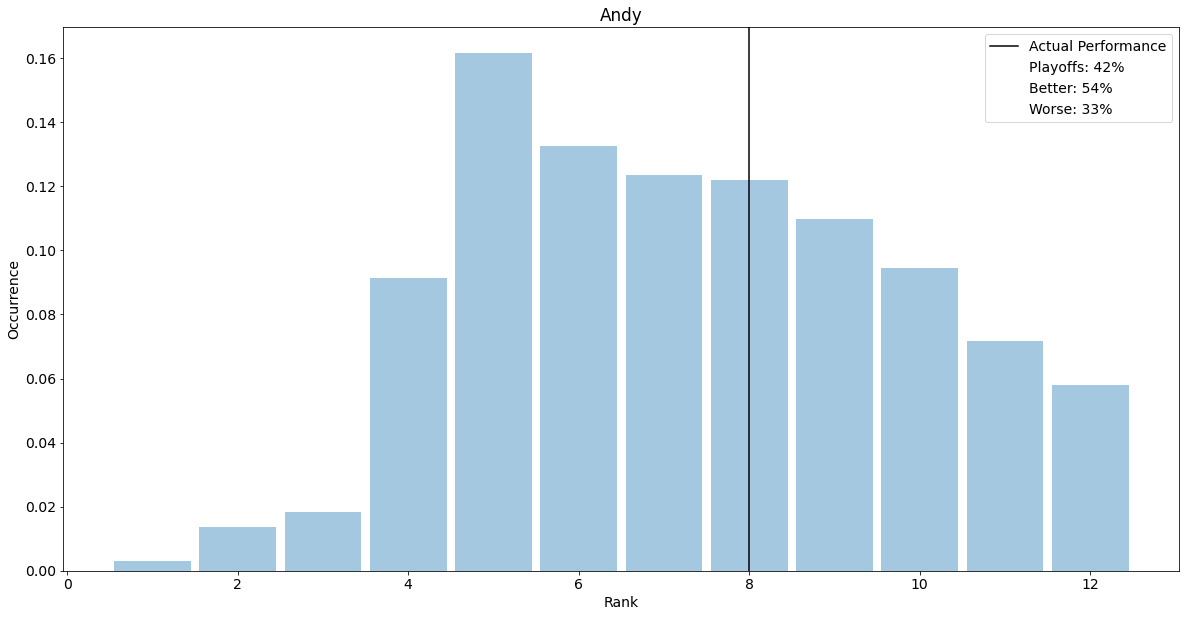

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


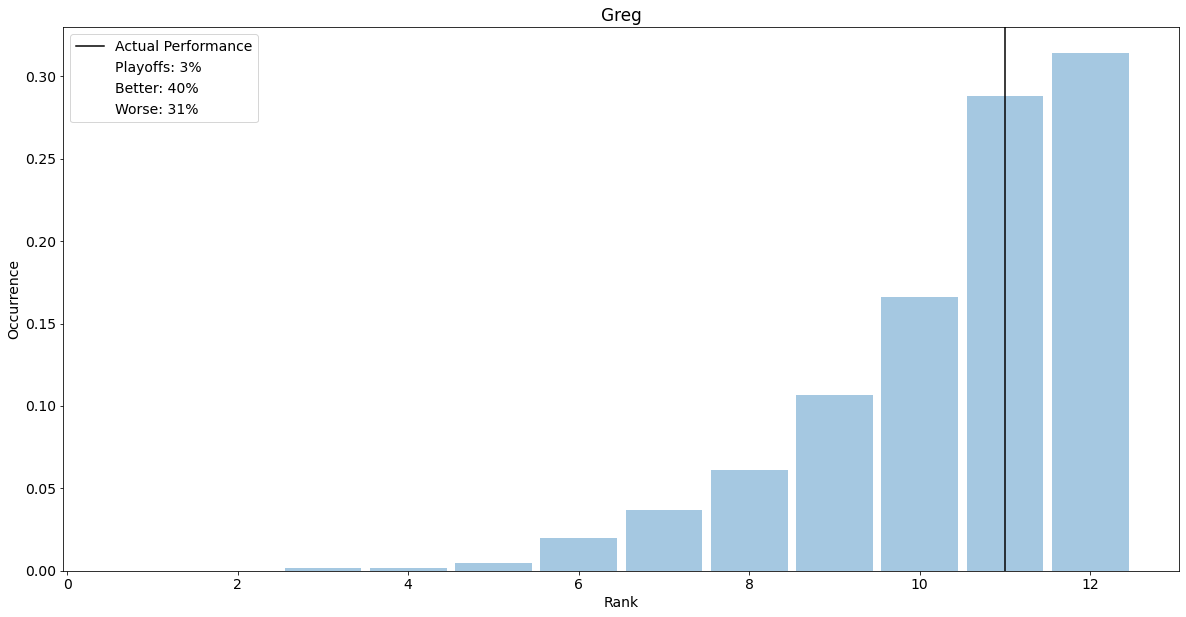

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


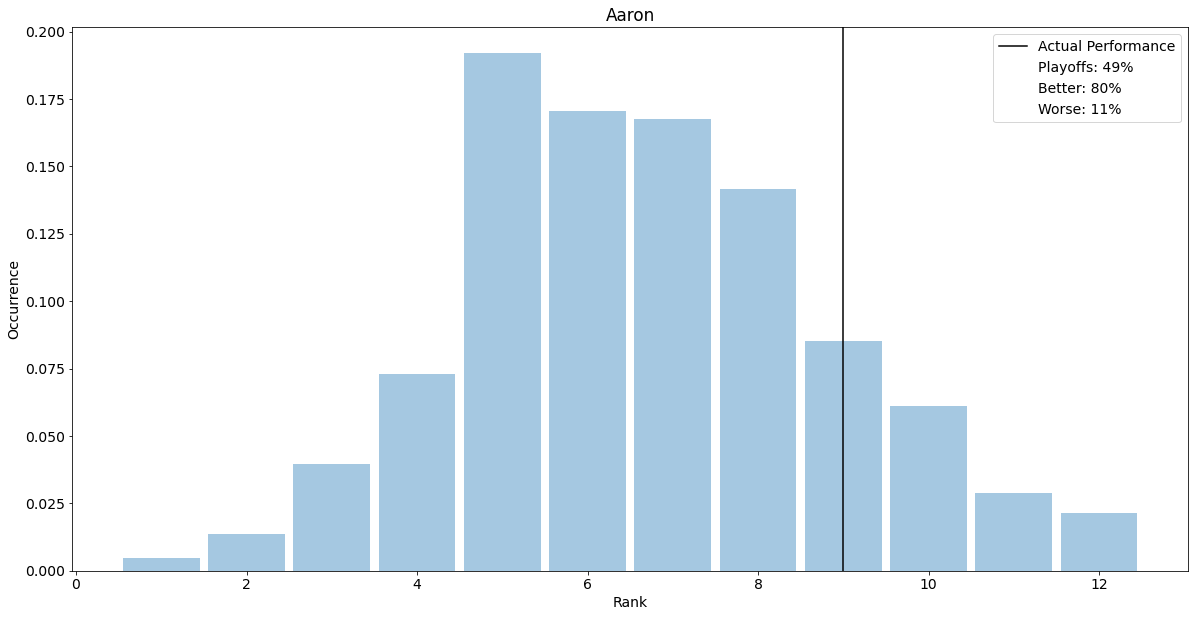

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


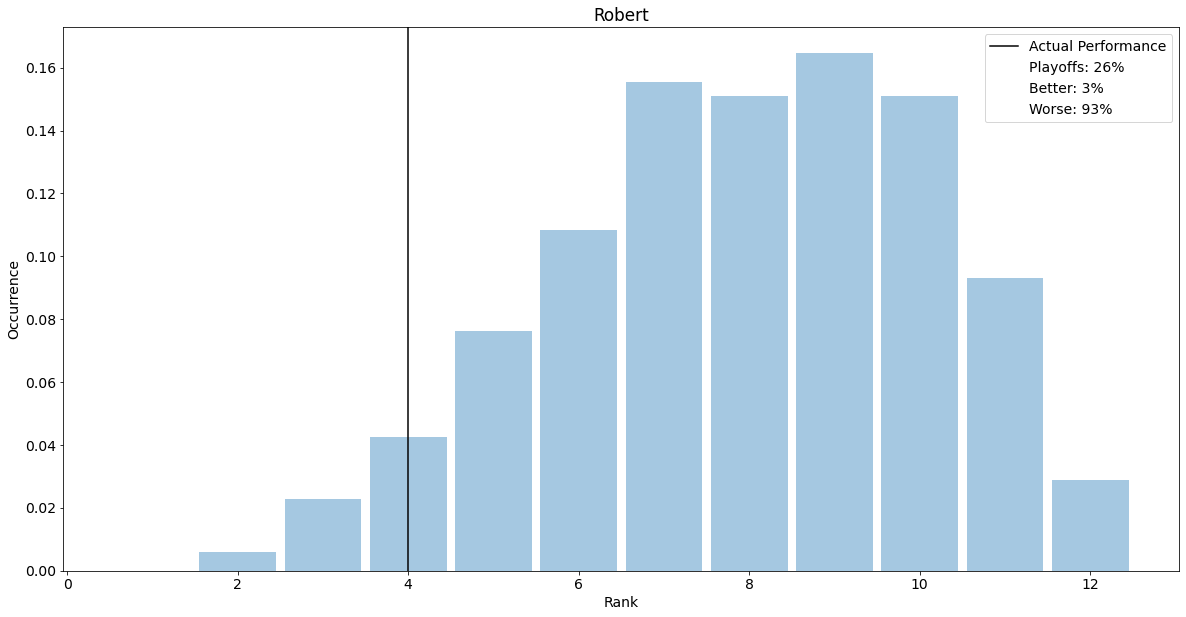

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


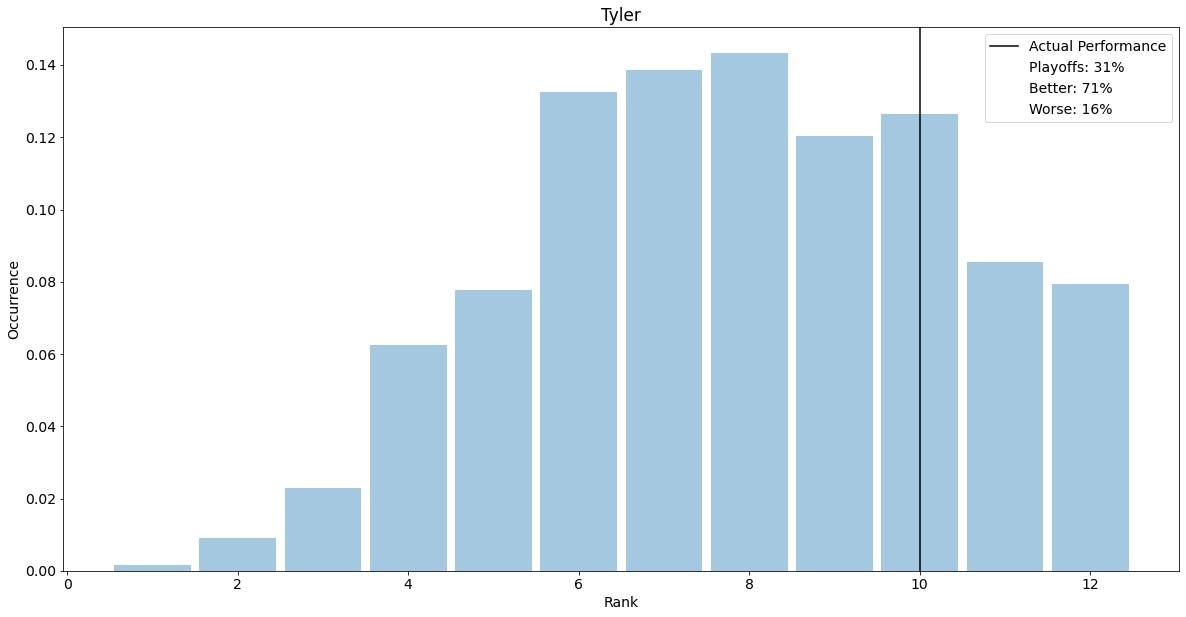

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


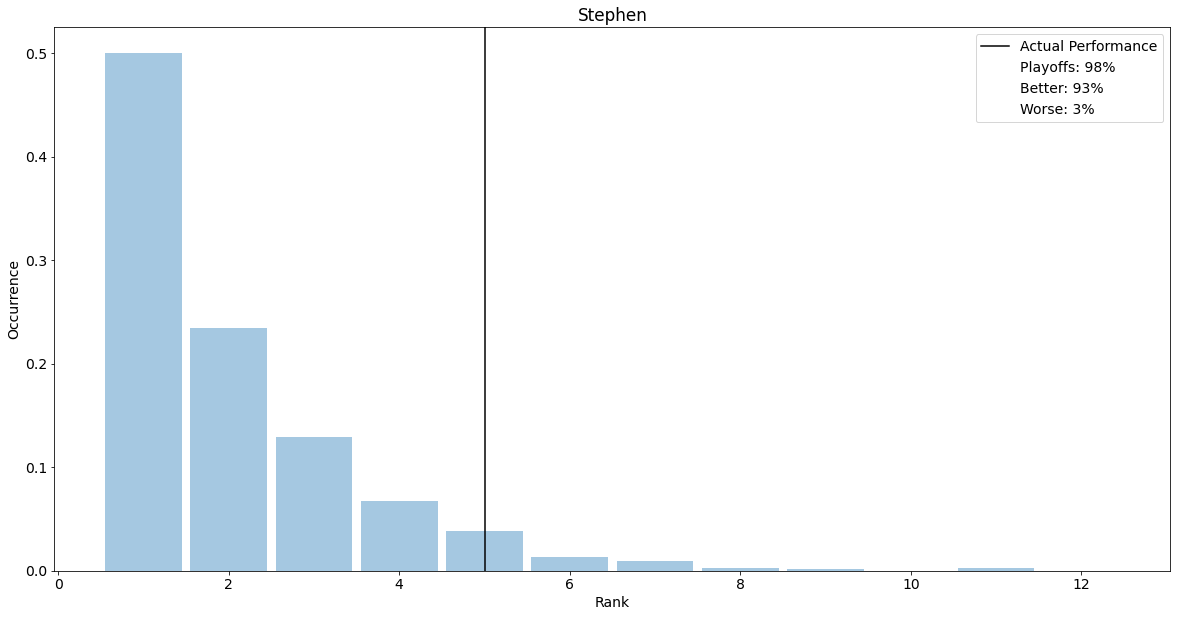

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


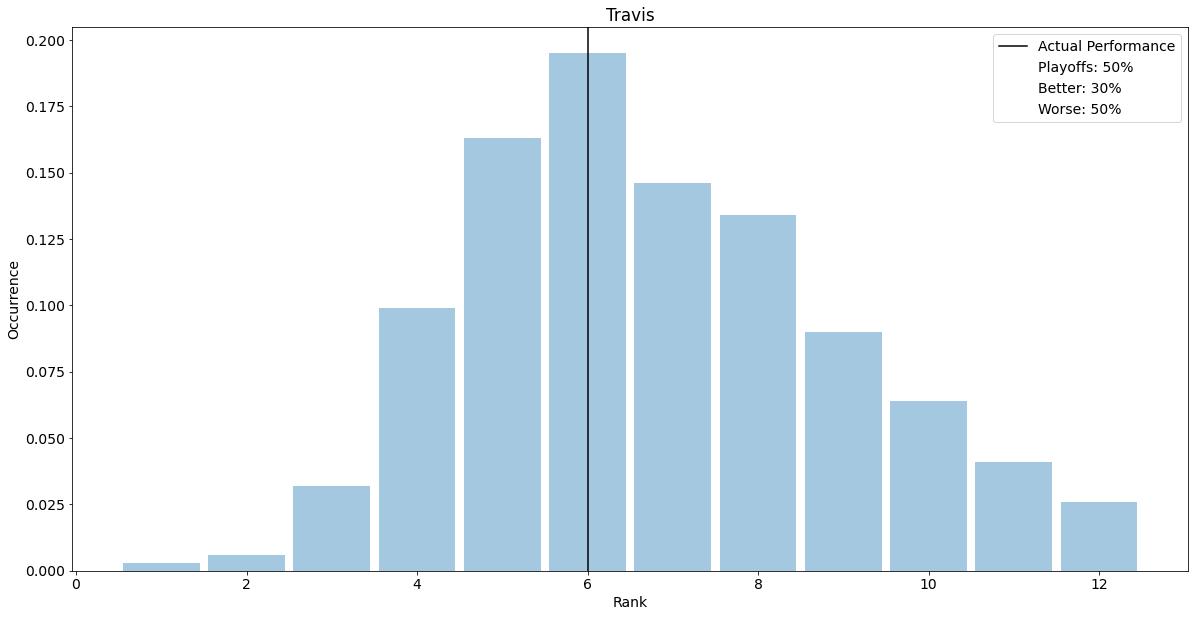

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


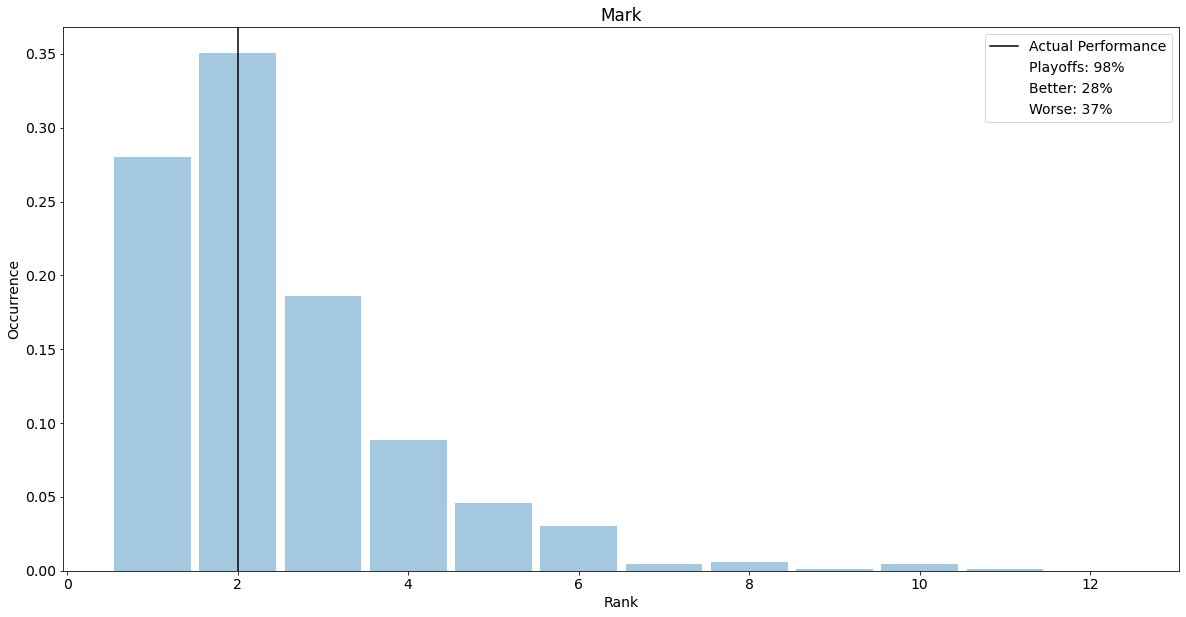

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


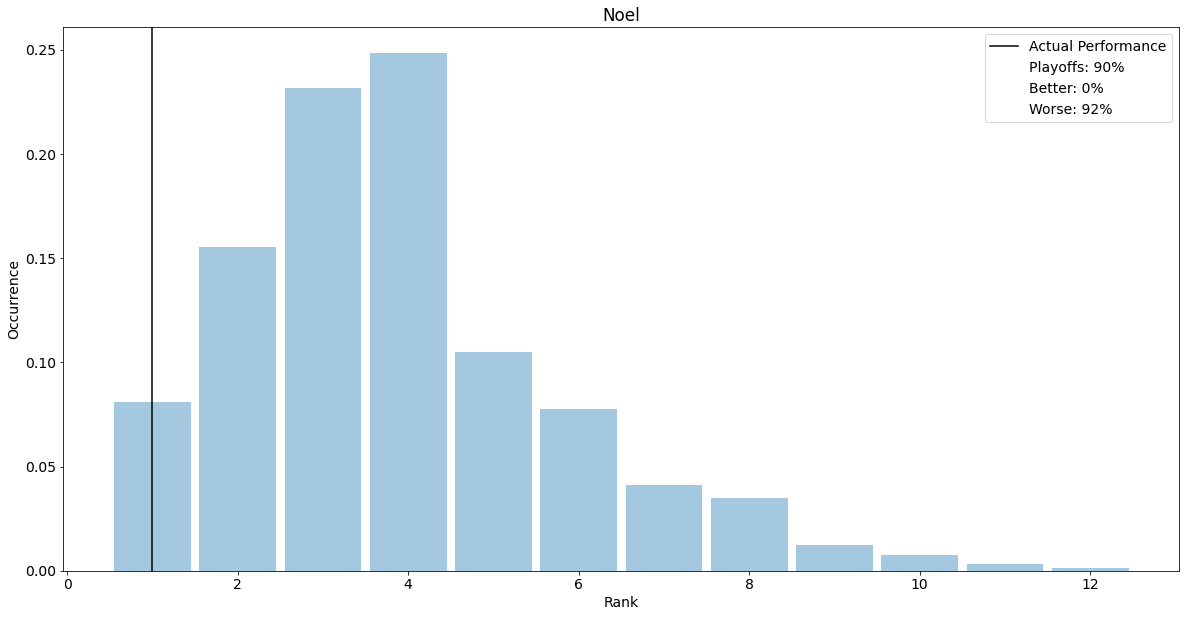

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


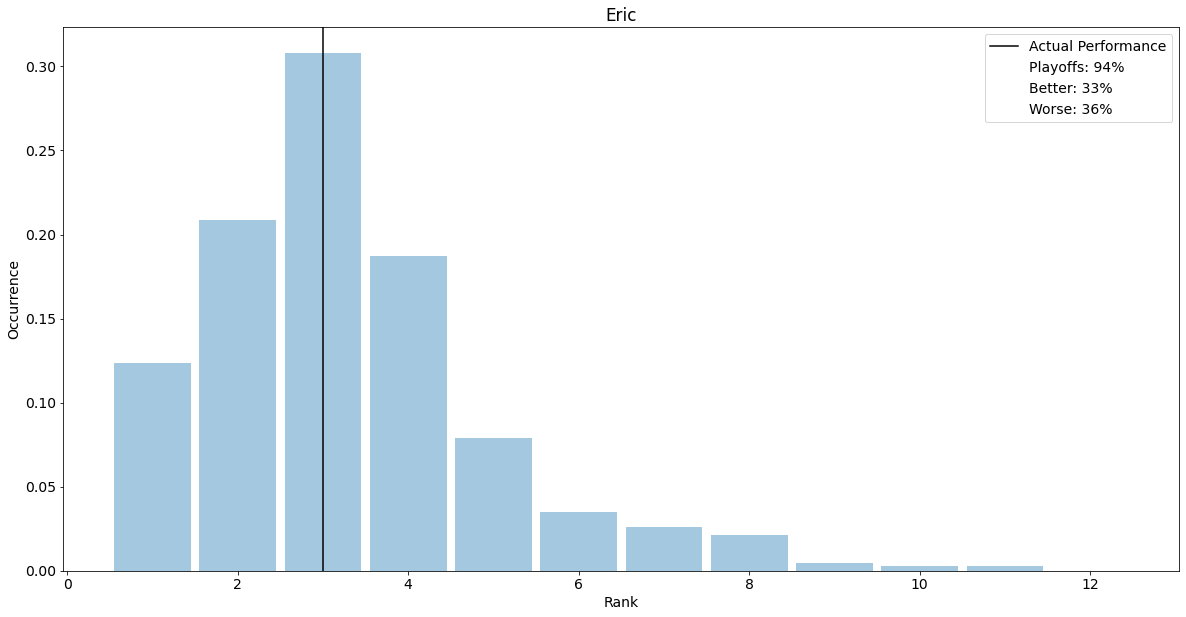

In [85]:
for i in range(0, len(cols)):
    #fig, ax = plt.subplots()
    col = cols[i]
    sns.distplot(df[col], kde = False, norm_hist = True, bins = 12, hist_kws = {"range": (1, 13), 'rwidth': 0.9, 'align': 'left'})
    plt.axvline(actual_ranks[i], color = "black", label = "Actual Performance")
    plt.plot([], [], ' ', label = f"Playoffs: {percent_playoffs[i]:.0f}%")
    plt.plot([], [], ' ', label = f"Better: {percent_better[i]:.0f}%")
    plt.plot([], [], ' ', label = f"Worse: {percent_worse[i]:.0f}%")

    plt.title(col)
    #anchored_text = AnchoredText("Test", loc= 2)
    #ax.add_artist(anchored_text)
    plt.xlabel("Rank")
    plt.ylabel("Occurrence")
    plt.legend()
    plt.savefig(f"Plots/{year}_{col}.pdf")

    
    plt.show()

In [82]:
def player_plot(player, player_name, list_of_schedules, scores, season_length, number_of_players):
    player_ranks = []
    current_schedule = get_schedule(2020)
    
    
    for schedule in list_of_schedules:
        player_ranks.append(calculate_rank(player, schedule, scores, season_length, number_of_players))

    plt.hist(player_ranks, density=1, rwidth = 0.9, bins = range(1,14), align='left')
    plt.ylabel('Probability')
    plt.xlabel('Rank')
    plt.title(player_name+" Rankings")
    
    actual_rank = calculate_rank(player, current_schedule, scores, season_length, number_of_players)
    percent_better = 0
    percent_worse = 0
    percent_playoffs = 0
    for rank in player_ranks:
        if rank > actual_rank:
            percent_worse = percent_worse + 1
        if rank < actual_rank: 
            percent_better = percent_better + 1
        if rank <= 6:
            percent_playoffs = percent_playoffs + 1
    percent_playoffs = float(percent_playoffs / len(player_ranks)) * 100
    percent_worse = float(percent_worse / len(player_ranks)) * 100
    percent_better = float(percent_better / len(player_ranks)) * 100
    

    print(f"Actual rank: {actual_rank}")
    print(f"Percent better: {percent_better:.0f}")
    print(f"Percent worse: {percent_worse:.0f}")
    print(f"Percent playoffs: {percent_playoffs:.0f}")
    
    return actual_rank, percent_better, percent_worse, percent_playoffs
    
    #plt.savefig(f'Plots/{player_name}Rankings.png', dpi=400)

In [83]:
number_of_players

12

Chris:
Actual rank: 7
Percent better: 14
Percent worse: 76
Percent playoffs: 14

Todd:
Actual rank: 12
Percent better: 63
Percent worse: 0
Percent playoffs: 5

Andy:
Actual rank: 8
Percent better: 54
Percent worse: 33
Percent playoffs: 42

Greg:
Actual rank: 11
Percent better: 40
Percent worse: 31
Percent playoffs: 3

Aaron:
Actual rank: 9
Percent better: 80
Percent worse: 11
Percent playoffs: 49

Robert:
Actual rank: 4
Percent better: 3
Percent worse: 93
Percent playoffs: 26

Tyler:
Actual rank: 10
Percent better: 71
Percent worse: 16
Percent playoffs: 31

Stephen:
Actual rank: 5
Percent better: 93
Percent worse: 3
Percent playoffs: 98

Travis:
Actual rank: 6
Percent better: 30
Percent worse: 50
Percent playoffs: 50

Mark:
Actual rank: 2
Percent better: 28
Percent worse: 37
Percent playoffs: 98

Noel:
Actual rank: 1
Percent better: 0
Percent worse: 92
Percent playoffs: 90

Eric:
Actual rank: 3
Percent better: 33
Percent worse: 36
Percent playoffs: 94



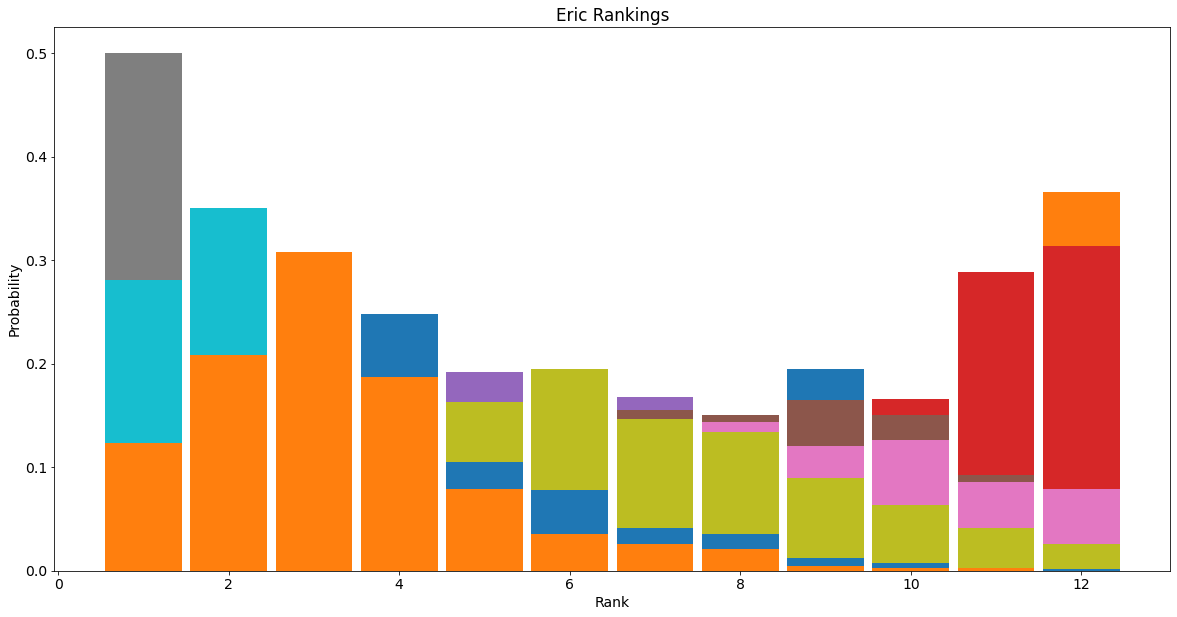

In [84]:
actual_ranks= []
percent_better = []
percent_worse = []
percent_playoffs = []
for i in range(0, len(cols)):
    col = cols[i]
    print(f"{col}:")
    x = player_plot(i, col, list_of_schedules, scores, season_length, number_of_players)
    actual_ranks.append(x[0])
    percent_better.append(x[1])
    percent_worse.append(x[2])
    percent_playoffs.append(x[3])
    print()